# Coffee_EDA_Questions



1) Read the dataset<br>
2) Remove/handle the null values<br>


<b>Seaborn EDA</b>

1) Depict Product based on Market Size on a count plot<br>
2) Depict State based on Market on a count plot<br>
3) Depict the Product Type vs Total Expenses on a Violin Plot based on Market<br>
4) Depict Market vs Budget COGS on a boxplot<br>
5) Depict Product vs Margin on a boxplot based on Market Size<br>
6) Depict the Market vs Budget Sales on a Violin Plot based on Product Type where product is Colombina or Darjeeling<br>
7) Depict the Product vs Inventory on a Box Plot based on Product Type where State is California or Nevada<br>
8) Generate Pairplot for the Coffee dataset where Type is Regular including fields- Budget Sales, Budget Profit, Budget COGS, Sales, Proift and COGS<br>
9)  Generate Pairplot for the Coffee dataset where Profit is over 250 based on Type including fields- Budget Sales, Budget Profit, Budget COGS, Sales, Proift and COGS<br>
10) Generate Pairplot for the Coffee dataset where Market is Western or Central based and Product Line is beans based on Type including fields- COGS, Sales, Proift and Total Expenses<br>
11) Depict Product vs Sales based on Market on a Strip Plot where Type is Decaf and Market is not Central<br>
12) Depict State vs Budget Profit based on Product Type on a Strip Plot where Market is not Western and Sales >300<br>
13) Depict Market vs Total Expenses based on Type on a Swarm Plot where Sales is over 200 and Market Size is Small<br>
14) Depict correlation values on a heatmap<br>
15) Depict Budget Sales vs Sales on a Joint Plot<br>
16) Depict Total Expenses on Joint plot where Sales>300 or Profit>300 where joint plot kind is scatter<br>
17)  Depict Budget COGS on Joint plot where Market is Eastern and Type is Regular where joint plot kind is hex
<br>
18) Depict Marketing on Joint plot where Market is not Central and Sales is over 500 where joint plot kind is kde<br>

### 1. Read the Dataset

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel('C:/Users/Coffee.xlsx')

### 2. Remove and handle the null values, if any

In [3]:
df.shape

(4248, 20)

In [4]:
df.columns

Index(['Area Code', 'Date', 'Market', 'Market Size', 'Product', 'Product Line',
       'Product Type', 'State', 'Type', 'Budget COGS', 'Budget Margin',
       'Budget Profit', 'Budget Sales', 'COGS', 'Inventory', 'Margin',
       'Marketing', 'Profit', 'Sales', 'Total Expenses'],
      dtype='object')

In [5]:
df.dtypes

Area Code          int64
Date               int64
Market            object
Market Size       object
Product           object
Product Line      object
Product Type      object
State             object
Type              object
Budget COGS        int64
Budget Margin      int64
Budget Profit      int64
Budget Sales       int64
COGS               int64
Inventory          int64
Margin             int64
Marketing          int64
Profit             int64
Sales              int64
Total Expenses     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area Code       4248 non-null   int64 
 1   Date            4248 non-null   int64 
 2   Market          4248 non-null   object
 3   Market Size     4248 non-null   object
 4   Product         4248 non-null   object
 5   Product Line    4248 non-null   object
 6   Product Type    4248 non-null   object
 7   State           4248 non-null   object
 8   Type            4248 non-null   object
 9   Budget COGS     4248 non-null   int64 
 10  Budget Margin   4248 non-null   int64 
 11  Budget Profit   4248 non-null   int64 
 12  Budget Sales    4248 non-null   int64 
 13  COGS            4248 non-null   int64 
 14  Inventory       4248 non-null   int64 
 15  Margin          4248 non-null   int64 
 16  Marketing       4248 non-null   int64 
 17  Profit          4248 non-null   int64 
 18  Sales   

In [7]:
df.isnull().sum()

Area Code         0
Date              0
Market            0
Market Size       0
Product           0
Product Line      0
Product Type      0
State             0
Type              0
Budget COGS       0
Budget Margin     0
Budget Profit     0
Budget Sales      0
COGS              0
Inventory         0
Margin            0
Marketing         0
Profit            0
Sales             0
Total Expenses    0
dtype: int64

In [8]:
numpy_df=df.values    # turned into numpy
numpy_df

array([[719, 40909, 'Central', ..., 94, 219, 36],
       [970, 40909, 'Central', ..., 68, 190, 39],
       [970, 40909, 'Central', ..., 101, 234, 38],
       ...,
       [360, 41609, 'West', ..., 76, 188, 45],
       [360, 41609, 'West', ..., 86, 188, 46],
       [206, 41609, 'West', ..., 30, 266, 125]], dtype=object)

In [9]:
df

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,719,40909,Central,Major Market,Amaretto,Beans,Coffee,Colorado,Regular,90,130,100,220,89,777,130,24,94,219,36
1,970,40909,Central,Major Market,Colombian,Beans,Coffee,Colorado,Regular,80,110,80,190,83,623,107,27,68,190,39
2,970,40909,Central,Major Market,Decaf Irish Cream,Beans,Coffee,Colorado,Decaf,100,140,110,240,95,821,139,26,101,234,38
3,303,40909,Central,Major Market,Green Tea,Leaves,Tea,Colorado,Regular,30,50,30,80,44,623,56,14,30,100,26
4,303,40909,Central,Major Market,Caffe Mocha,Beans,Espresso,Colorado,Regular,60,90,70,150,54,456,80,15,54,134,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,206,41609,West,Small Market,Caffe Latte,Beans,Espresso,Washington,Regular,20,30,20,50,24,567,32,7,19,60,19
4244,509,41609,West,Small Market,Caffe Mocha,Beans,Espresso,Washington,Regular,60,80,30,140,65,403,80,24,34,155,57
4245,360,41609,West,Small Market,Decaf Espresso,Beans,Espresso,Washington,Decaf,70,100,60,170,80,1079,96,24,76,188,45
4246,360,41609,West,Small Market,Colombian,Beans,Coffee,Washington,Regular,80,120,80,200,72,461,104,23,86,188,46


In [10]:
df.isnull().sum()

Area Code         0
Date              0
Market            0
Market Size       0
Product           0
Product Line      0
Product Type      0
State             0
Type              0
Budget COGS       0
Budget Margin     0
Budget Profit     0
Budget Sales      0
COGS              0
Inventory         0
Margin            0
Marketing         0
Profit            0
Sales             0
Total Expenses    0
dtype: int64

### in pandas

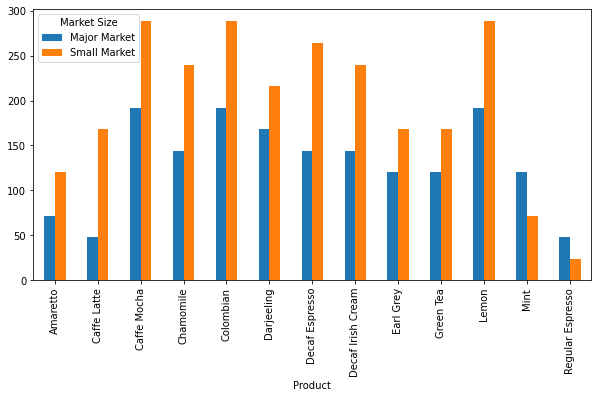

In [331]:
s1.unstack(level=0).plot(kind='bar',figsize=(10,5))
plt.show()

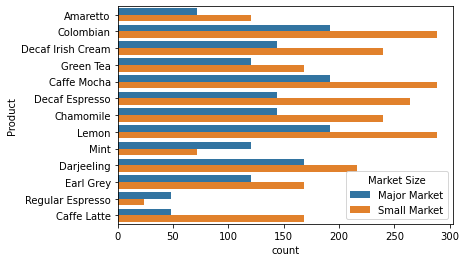

In [333]:
# in horizental 
sns.countplot(y=df['Product'],hue=df['Market Size'])
plt.show()

### 2. Depict State based on Market on a count plot

In [342]:
ms=df.groupby(['Market','State'])['State'].count()
ms

Market   State        
Central  Colorado         264
         Illinois         216
         Iowa             216
         Missouri         216
         Ohio             216
         Wisconsin        216
East     Connecticut      168
         Florida          216
         Massachusetts    144
         New Hampshire    168
         New York         192
South    Louisiana        168
         New Mexico       168
         Oklahoma         168
         Texas            168
West     California       288
         Nevada           264
         Oregon           264
         Utah             288
         Washington       240
Name: State, dtype: int64

In [ ]:
#df.groupby(['State','Market'])['Market'].counts()

C:\Users\Avinash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


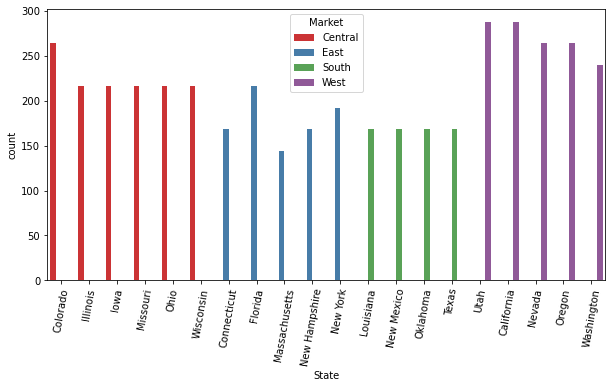

In [378]:
plt.figure(figsize=(10,5))
sns.countplot(df['State'],hue=df['Market'],palette='Set1') # palette = set1,set2,set3,bright
plt.xticks(rotation=80)
plt.show()

### 3  Depict the Product Type vs Total Expenses on a Violin Plot based on Market

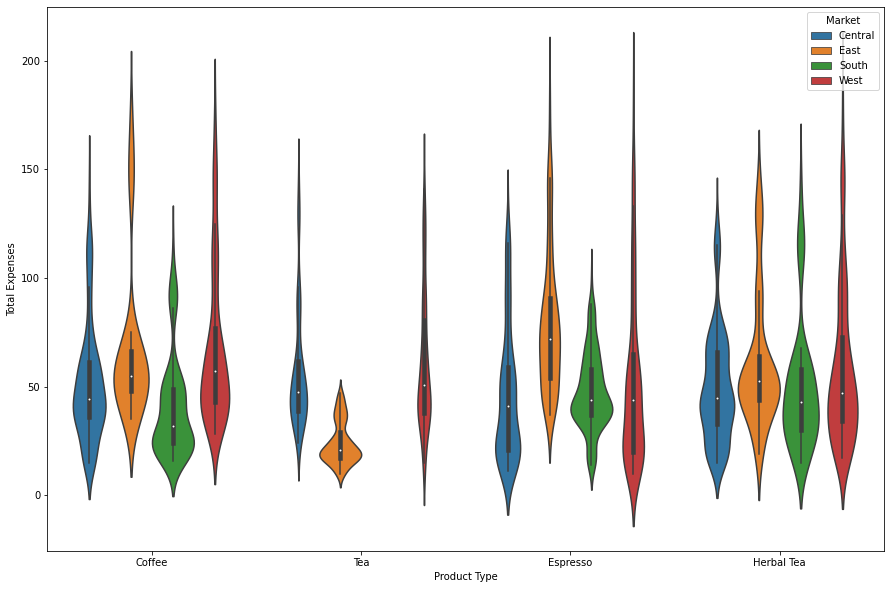

In [377]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Product Type',y='Total Expenses', data=df,hue='Market')
plt.show()


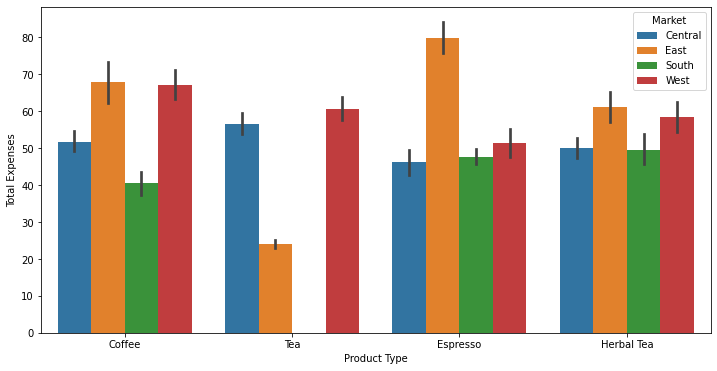

In [382]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product Type', y='Total Expenses',data=df, hue='Market')
plt.show()

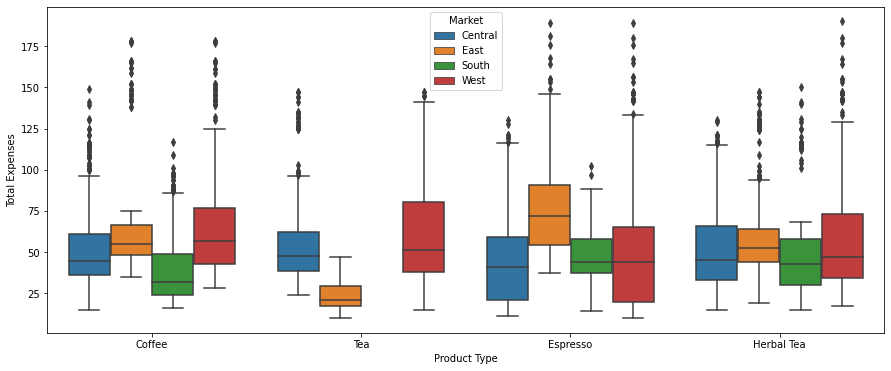

In [385]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Product Type',y='Total Expenses',data=df,hue='Market')
plt.show()

### 4) Depict Market vs Budget COGS on a boxplot

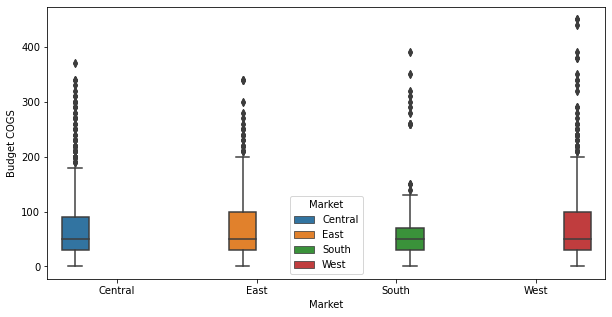

In [389]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Market',y='Budget COGS',data=df,hue='Market')
plt.show()

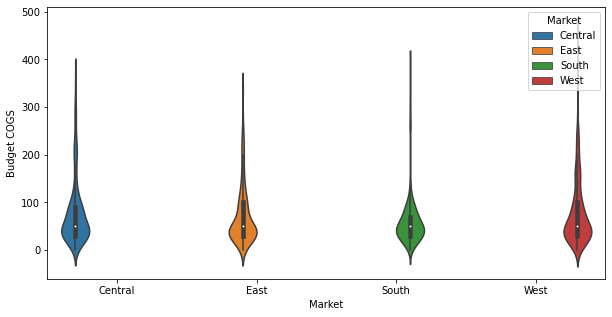

In [394]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Market',y='Budget COGS', data=df, hue='Market')
plt.show()

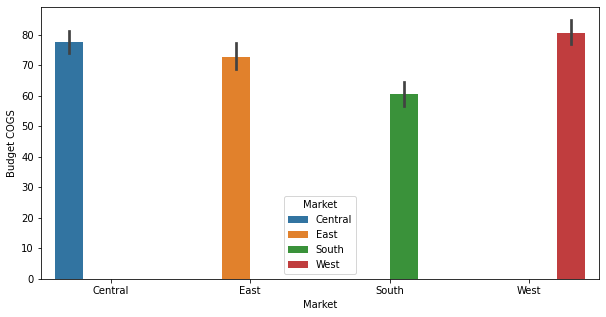

In [397]:
plt.figure(figsize=(10,5))
sns.barplot(x='Market',y='Budget COGS', data=df, hue='Market')
plt.show()

### 5 depict Product vs Margin on a boxplot based on Market Size

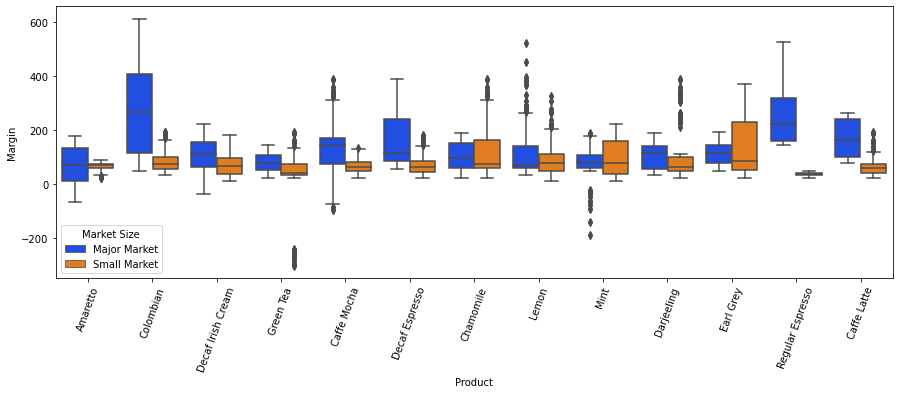

In [409]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Product',y='Margin', data=df, hue='Market Size',palette='bright')
plt.xticks(rotation=70)
plt.show()

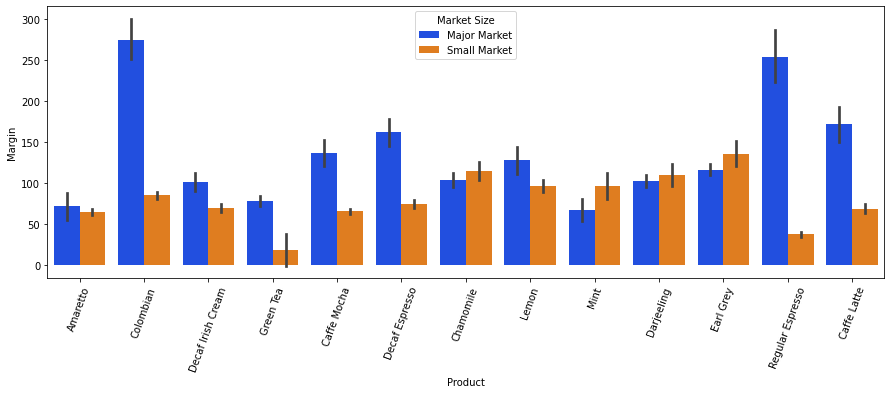

In [410]:
plt.figure(figsize=(15,5))
sns.barplot(x='Product',y='Margin', data=df, hue='Market Size',palette='bright')
plt.xticks(rotation=70)
plt.show()

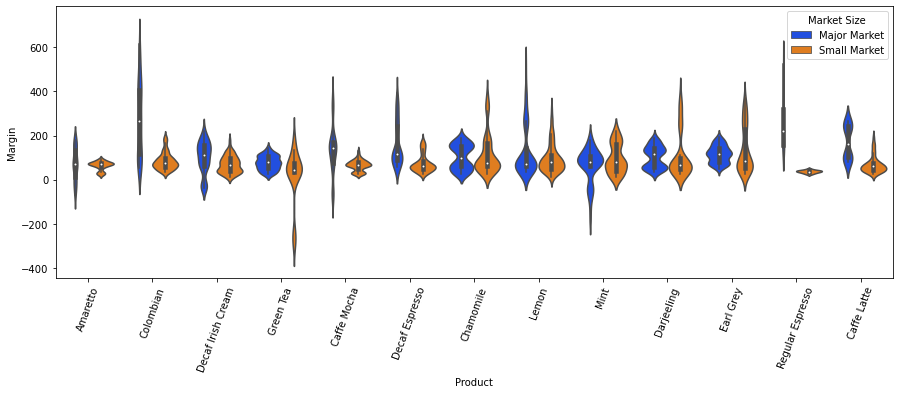

In [412]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Product',y='Margin', data=df, hue='Market Size',palette='bright')
plt.xticks(rotation=70)
plt.show()

### 6 Depict the Market vs BudgetSales on a Violin Plot based in Product Type where Product is Colombina or Darjeeling

In [415]:
df['Product Type'].value_counts()

Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: Product Type, dtype: int64

In [417]:
df['Product'].value_counts()

Caffe Mocha          480
Colombian            480
Lemon                480
Decaf Espresso       408
Darjeeling           384
Chamomile            384
Decaf Irish Cream    384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Mint                 192
Amaretto             192
Regular Espresso      72
Name: Product, dtype: int64

In [435]:
p=df[(df['Product']=='Colombian') | (df['Product']=='Darjeeling')]
p.shape

(864, 20)

In [436]:
p.head(2)

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
1,970,40909,Central,Major Market,Colombian,Beans,Coffee,Colorado,Regular,80,110,80,190,83,623,107,27,68,190,39
9,719,40909,Central,Major Market,Darjeeling,Leaves,Tea,Colorado,Regular,40,70,20,110,58,338,72,22,17,130,55


In [437]:
p['Product Type'].value_counts(),p['Product'].value_counts()

(Coffee    480
 Tea       384
 Name: Product Type, dtype: int64,
 Colombian     480
 Darjeeling    384
 Name: Product, dtype: int64)

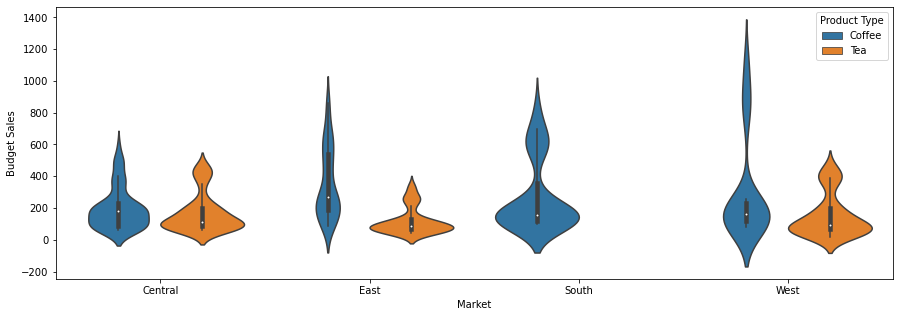

In [440]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Market',y='Budget Sales',data=p, hue='Product Type')
plt.show()
plt.show()

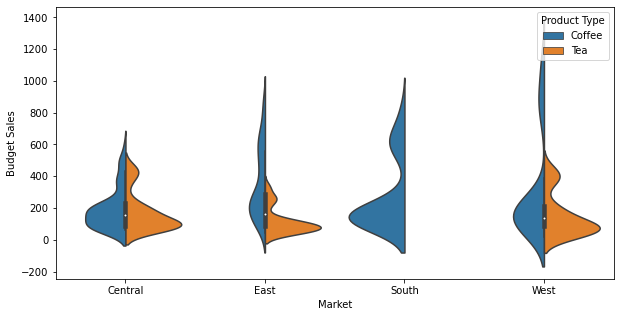

In [441]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Market',y='Budget Sales',data=p, hue='Product Type',split=True)
plt.show()
plt.show()

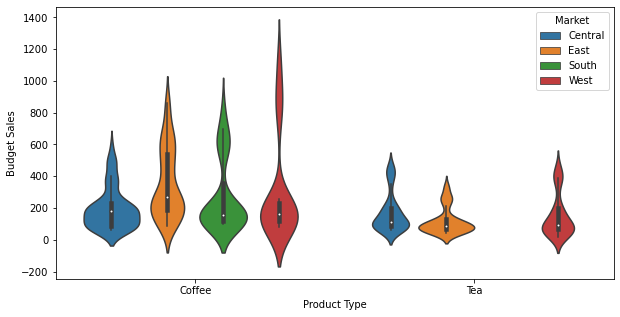

In [439]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Product Type',y='Budget Sales',data=p, hue='Market')
plt.show()
plt.show()

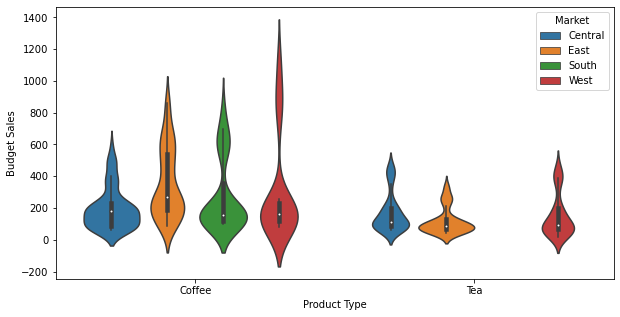

In [443]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Product Type',y='Budget Sales',data=p, hue='Market',spilit=True)
plt.show()
plt.show()

### 7 Depict the product vs Inventory on a Box Plot based on Product Type where state is California or Nevada

In [446]:
s=df[(df['State']=='California') | (df['State']=='Nevada')]
s.shape

(552, 20)

In [449]:
s['State'].value_counts()

California    288
Nevada        264
Name: State, dtype: int64

In [451]:
s['Product'],s['Inventory']

(133           Caffe Latte
 134           Caffe Mocha
 135        Decaf Espresso
 136             Chamomile
 137                 Lemon
               ...        
 4222          Caffe Latte
 4223          Caffe Mocha
 4224       Decaf Espresso
 4225            Colombian
 4226    Decaf Irish Cream
 Name: Product, Length: 552, dtype: object,
 133     1459
 134      725
 135     1310
 136      821
 137      965
         ... 
 4222     344
 4223     851
 4224     807
 4225     250
 4226    1009
 Name: Inventory, Length: 552, dtype: int64)

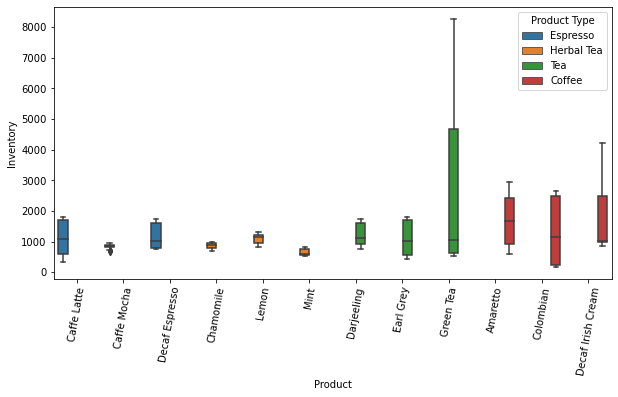

In [456]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Product',y='Inventory',data=s,hue='Product Type')
plt.xticks(rotation=80)
plt.show()

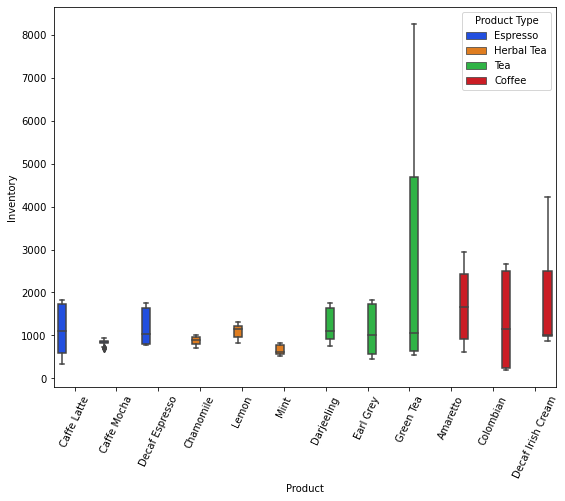

In [454]:
plt.figure(figsize=(9,7))
sns.boxplot(x=s['Product'],y=s['Inventory'],
            hue=s['Product Type'],palette="bright")
plt.xticks(rotation=65)
plt.show()

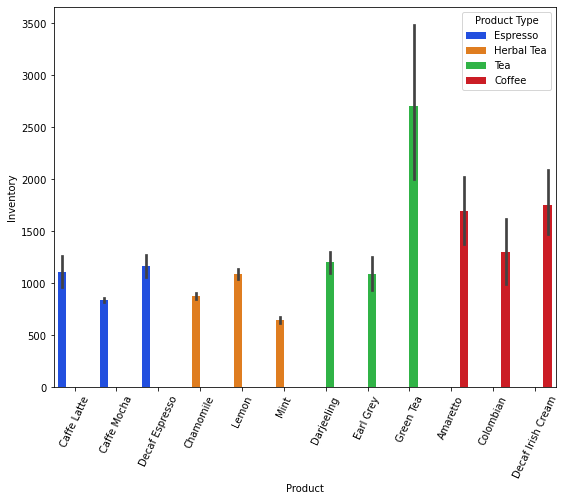

In [460]:
plt.figure(figsize=(9,7))
sns.barplot(x=s['Product'],y=s['Inventory'],
            hue=s['Product Type'],palette="bright")
plt.xticks(rotation=65)
plt.show()

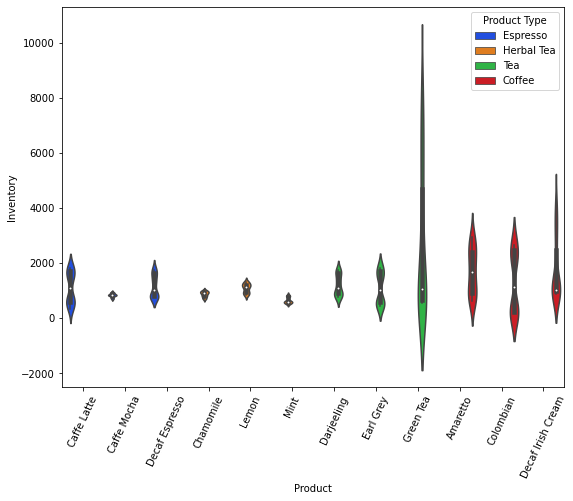

In [461]:
plt.figure(figsize=(9,7))
sns.violinplot(x=s['Product'],y=s['Inventory'],
            hue=s['Product Type'],palette="bright")
plt.xticks(rotation=65)
plt.show()

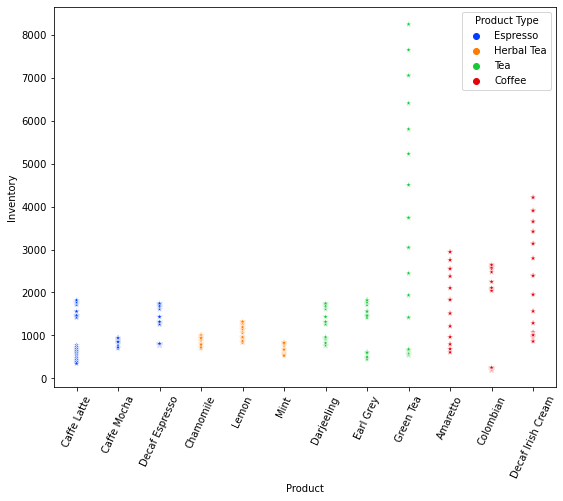

In [462]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=s['Product'],y=s['Inventory'],
            hue=s['Product Type'],palette="bright",marker='*')
plt.xticks(rotation=65)
plt.show()

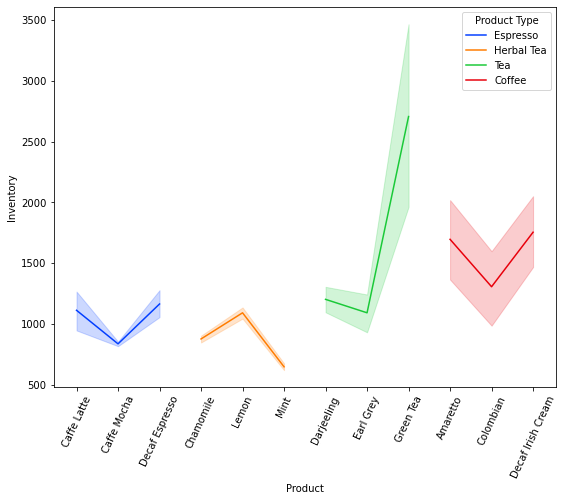

In [463]:
plt.figure(figsize=(9,7))
sns.lineplot(x=s['Product'],y=s['Inventory'],
            hue=s['Product Type'],palette="bright")
plt.xticks(rotation=65)
plt.show()

### 8 Generate Pairplot for the coffee dataset where type is Regular including fields - Budget Sales, Budget Profit, Budget COGS, Sales, Profit and COGS

In [467]:
tr=df[df['Type']=='Regular']
tr.shape

(2400, 20)

In [468]:
tr.head(2)

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,719,40909,Central,Major Market,Amaretto,Beans,Coffee,Colorado,Regular,90,130,100,220,89,777,130,24,94,219,36
1,970,40909,Central,Major Market,Colombian,Beans,Coffee,Colorado,Regular,80,110,80,190,83,623,107,27,68,190,39


In [473]:
p=tr[['Budget Sales','Budget Profit','Budget COGS','Sales','Profit', 'COGS']]
p.head(3)

,Budget Sales,Budget Profit,Budget COGS,Sales,Profit,COGS
0,220,100,90,219,94,89
1,190,80,80,190,68,83
3,80,30,30,100,30,44


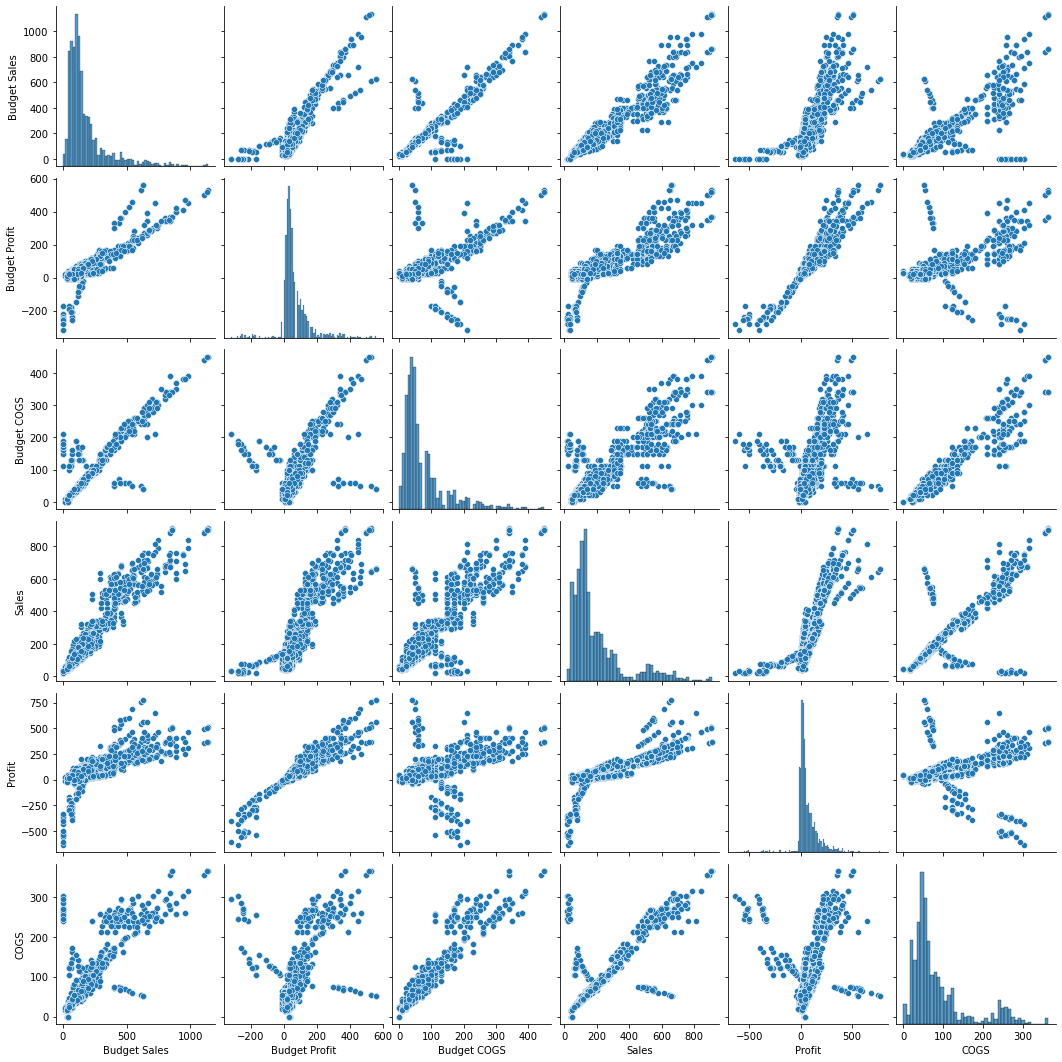

In [474]:
sns.pairplot(tr[['Budget Sales','Budget Profit','Budget COGS','Sales','Profit', 'COGS']])
plt.show()

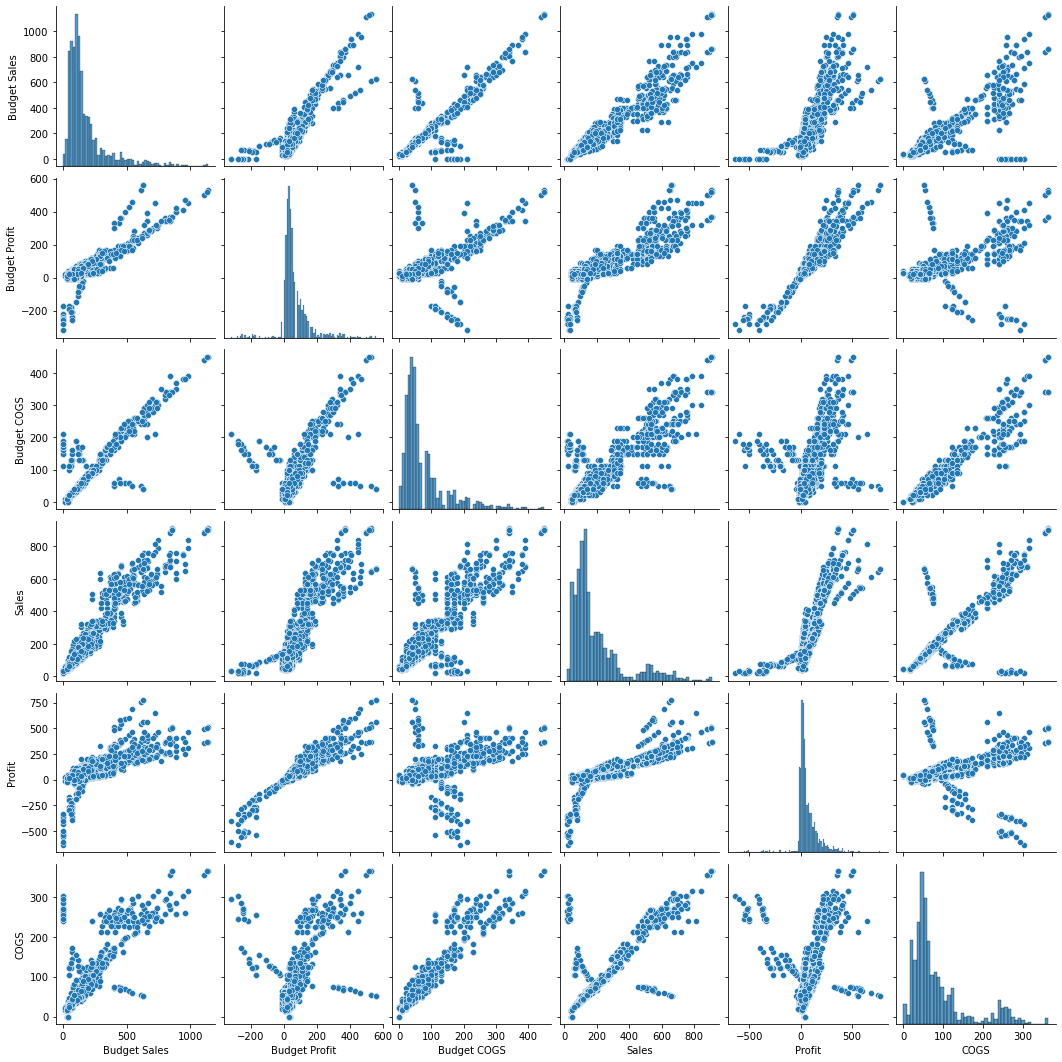

In [476]:
sns.pairplot(p)
plt.show()

### 9. Generate pairplot for the coffee dataset where Profit is over 250 based on type including field - budget Sales, Budget Profil, Budget COGS, Sales, Profit and COGS

In [489]:
om=df[df['Profit']>250]
om.shape

(181, 20)

In [538]:
ok=om[['Budget Sales','Budget Profit','Budget COGS', 'Sales', 'Profit','COGS','Type']]

In [539]:
ok.head(3)

,Budget Sales,Budget Profit,Budget COGS,Sales,Profit,COGS,Type
76,460,360,60,494,367,72,Regular
90,640,260,260,678,262,271,Regular
143,840,370,340,678,262,271,Regular


In [542]:
ok['Type'].value_counts()

Regular    132
Decaf       49
Name: Type, dtype: int64

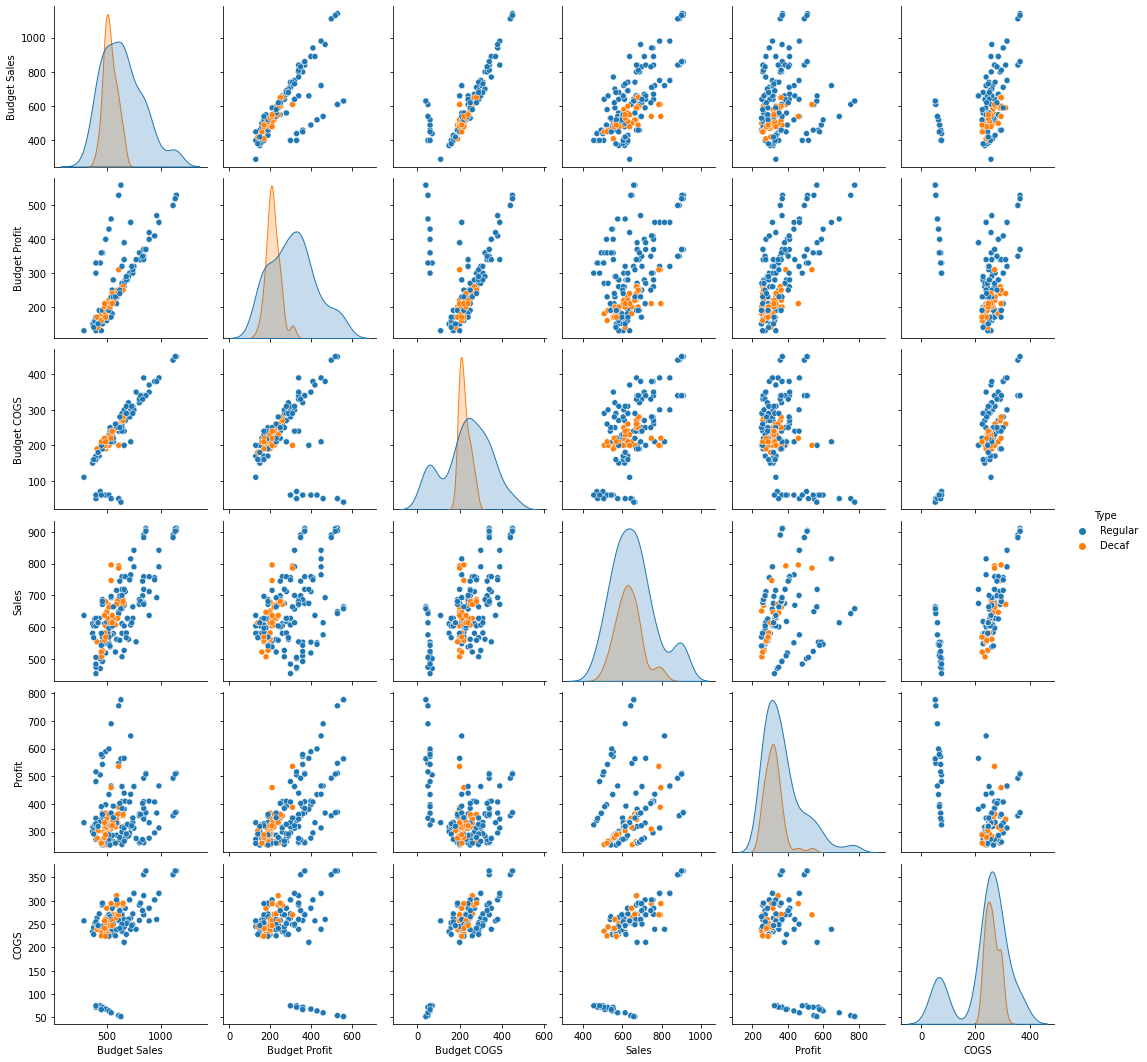

In [540]:
sns.pairplot(data=ok, hue='Type')
plt.show()

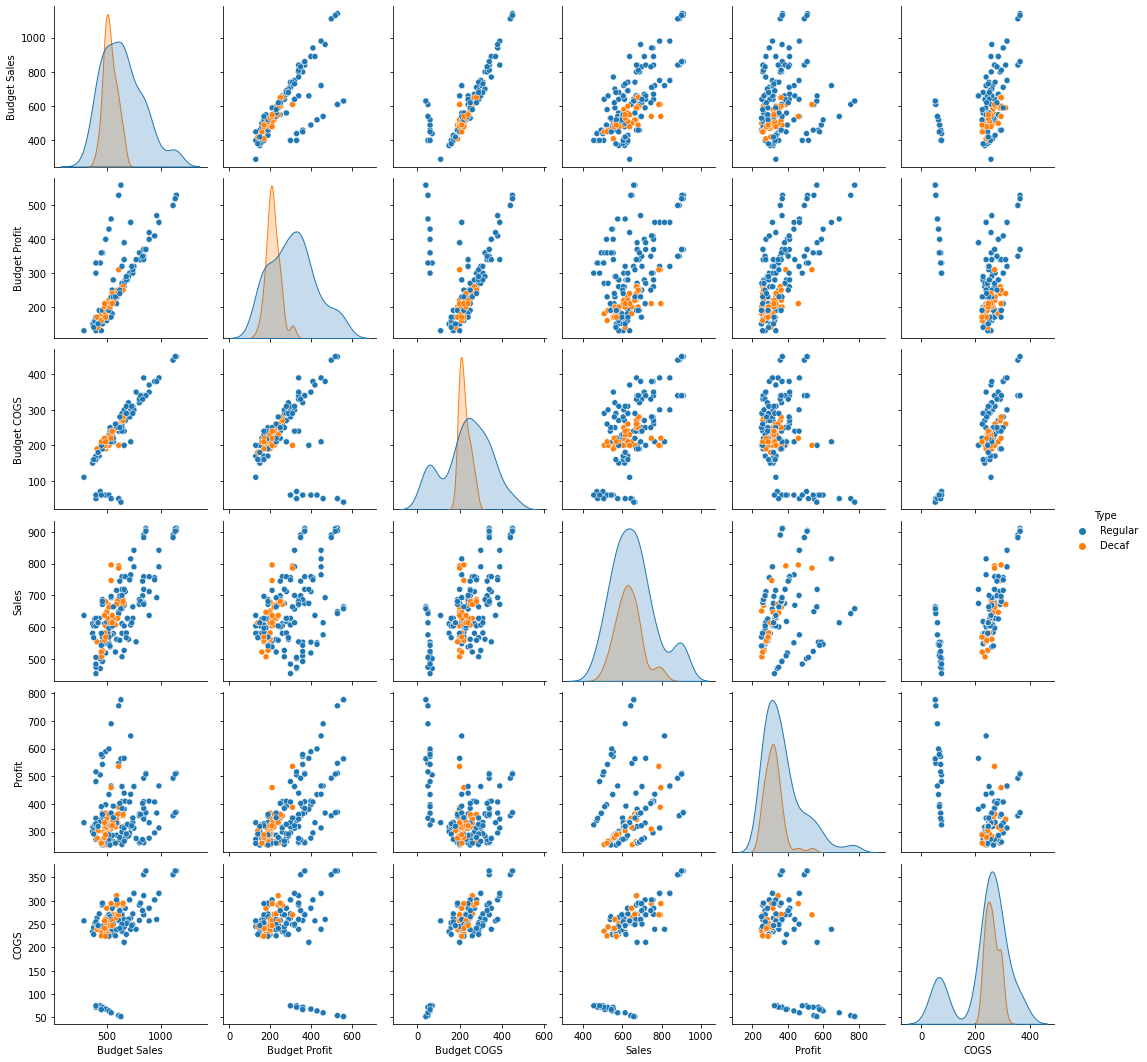

In [543]:
sns.pairplot(om[['Budget Sales','Budget Profit','Budget COGS', 'Sales', 'Profit','COGS','Type']], hue='Type')
plt.show()

In [486]:
#df.value_counts()
#df.shape
#df.dtypes
#df.info()
#type(df)
#df.unquie

### 10 Generate Pairplot for the coffee dataset where Market is Western or Central based and Product Line is beans Based on type including fields - COGS, Sales, Profit and Total Expenses

In [498]:
df['Market'].value_counts()

Central    1344
West       1344
East        888
South       672
Name: Market, dtype: int64

In [499]:
df['Product Line'].value_counts()

Beans     2232
Leaves    2016
Name: Product Line, dtype: int64

In [500]:
mwc=df[(df['Market']=='Central') | (df['Market']=='Western') & (df['Product Line']=='Beans')]
mwc.shape

(1344, 20)

In [545]:
cd=mwc[['COGS','Sales','Profit','Total Expenses','Type']]
cd.head(2)

,COGS,Sales,Profit,Total Expenses,Type
0,89,219,94,36,Regular
1,83,190,68,39,Regular


In [546]:
cd['Type'].value_counts()

Regular    720
Decaf      624
Name: Type, dtype: int64

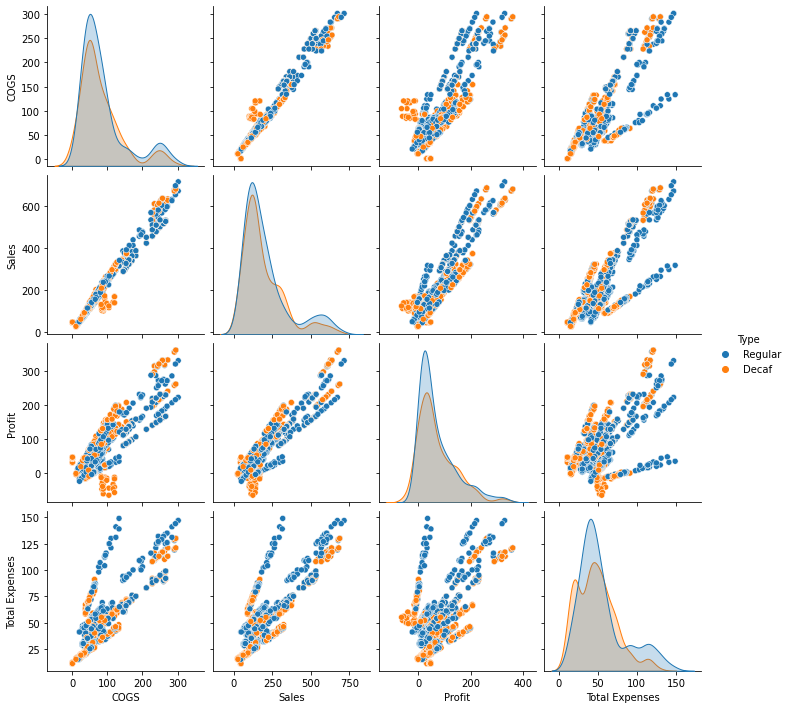

In [547]:
sns.pairplot(cd, hue='Type')
plt.show()

#### 11 Depict Product vs Sales based on Market on a Strip Plot where type is Decaf and Market is not Central 

In [513]:
m=df[(df['Type']=='Decaf') & (df['Market']!='Central')]
m.head(2)

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
58,475,40909,East,Small Market,Decaf Espresso,Beans,Espresso,Connecticut,Decaf,50,70,40,120,55,312,75,18,30,130,45
61,860,40909,East,Small Market,Lemon,Leaves,Herbal Tea,Connecticut,Decaf,60,80,40,140,85,494,105,32,40,190,65


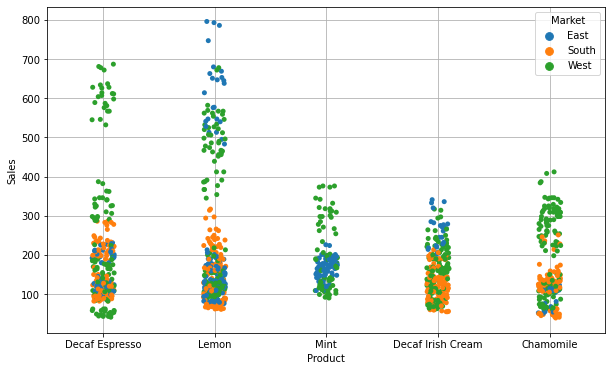

In [516]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Product',y='Sales',data=m, hue='Market')
plt.grid()
plt.show()

### 12 Depict State vs Budget Profit based on Product Type on a Strip Plot where market is not Western and State >300

In [517]:
df['Market'].value_counts()

Central    1344
West       1344
East        888
South       672
Name: Market, dtype: int64

In [548]:
df.head(1)

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,719,40909,Central,Major Market,Amaretto,Beans,Coffee,Colorado,Regular,90,130,100,220,89,777,130,24,94,219,36


In [566]:
bp=df[(df['Market']!='West') & (df['Budget Profit']>300)]
bp.shape

(52, 20)

In [567]:
bp.head(1)

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
76,413,40909,East,Major Market,Colombian,Beans,Coffee,Massachusetts,Regular,60,400,360,460,72,558,422,23,367,494,55


In [568]:
bp['Market'].value_counts(), df['Market'].value_counts()

(East       40
 Central     8
 South       4
 Name: Market, dtype: int64,
 Central    1344
 West       1344
 East        888
 South       672
 Name: Market, dtype: int64)

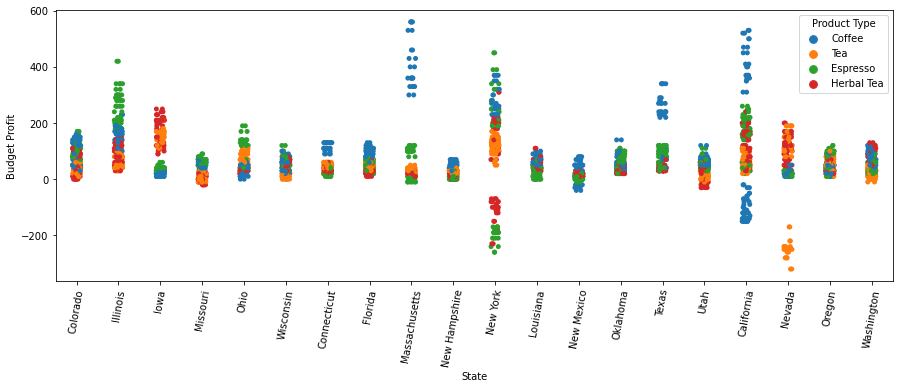

In [569]:
plt.figure(figsize=(15,5))
sns.stripplot(x='State',y='Budget Profit',data=df, hue='Product Type')
plt.xticks(rotation=80)
plt.show()

### 13 Depict Market vs Total Expenses based on Type on a Swarm Plot where Sales is over 200 and Market Size is Small

In [570]:
df.head(1)

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,719,40909,Central,Major Market,Amaretto,Beans,Coffee,Colorado,Regular,90,130,100,220,89,777,130,24,94,219,36


In [571]:
ms=df[(df['Market Size']=='Small Market') & (df['Sales']>200)]
ms.shape

(506, 20)

In [572]:
ms['Sales'].value_counts().count()

171

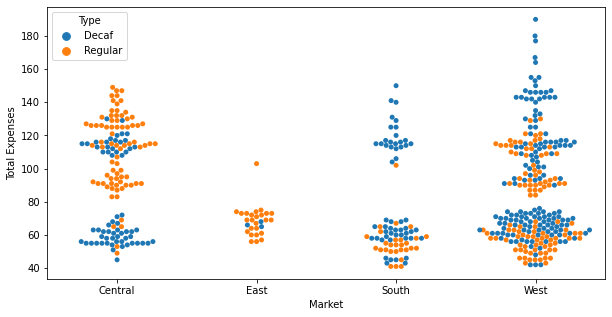

In [573]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Market',y='Total Expenses',data=ms, hue='Type')
plt.show()

### 14 Depict correlation value on a heatmap

In [586]:
df.columns

Index(['Market', 'Market Size', 'Product', 'Product Line', 'Product Type',
       'State', 'Type', 'Budget COGS', 'Budget Margin', 'Budget Profit',
       'Budget Sales', 'COGS', 'Inventory', 'Margin', 'Marketing', 'Profit',
       'Sales', 'Total Expenses'],
      dtype='object')

In [592]:
#df.drop(['Area Code','Date'],axis=1, inplace=True)
df.head(2)

,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,Central,Major Market,Amaretto,Beans,Coffee,Colorado,Regular,90,130,100,220,89,777,130,24,94,219,36
1,Central,Major Market,Colombian,Beans,Coffee,Colorado,Regular,80,110,80,190,83,623,107,27,68,190,39


In [596]:
corr=df.corr()
corr

,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
Budget COGS,1.000000,0.750422,0.579176,0.911598,0.947762,0.579876,0.680549,0.773709,0.479862,0.862882,0.744259
Budget Margin,0.750422,1.000000,0.949637,0.955792,0.688587,0.119373,0.963460,0.543039,0.876844,0.920757,0.530776
Budget Profit,0.579176,0.949637,1.000000,0.848285,0.514967,-0.019275,0.922812,0.279315,0.937606,0.815435,0.255811
Budget Sales,0.911598,0.955792,0.848285,1.000000,0.849901,0.332216,0.901981,0.681946,0.758830,0.956538,0.661217
COGS,0.947762,0.688587,0.514967,0.849901,1.000000,0.621086,0.678797,0.818271,0.464838,0.886651,0.782534
Inventory,0.579876,0.119373,-0.019275,0.332216,0.621086,1.000000,0.061259,0.497764,-0.091545,0.325934,0.433708
Margin,0.680549,0.963460,0.922812,0.901981,0.678797,0.061259,1.000000,0.531947,0.920604,0.938809,0.521254
Marketing,0.773709,0.543039,0.279315,0.681946,0.818271,0.497764,0.531947,1.000000,0.225465,0.710515,0.966167
Profit,0.479862,0.876844,0.937606,0.758830,0.464838,-0.091545,0.920604,0.225465,1.000000,0.797331,0.199976
Sales,0.862882,0.920757,0.815435,0.956538,0.886651,0.325934,0.938809,0.710515,0.797331,1.000000,0.689350


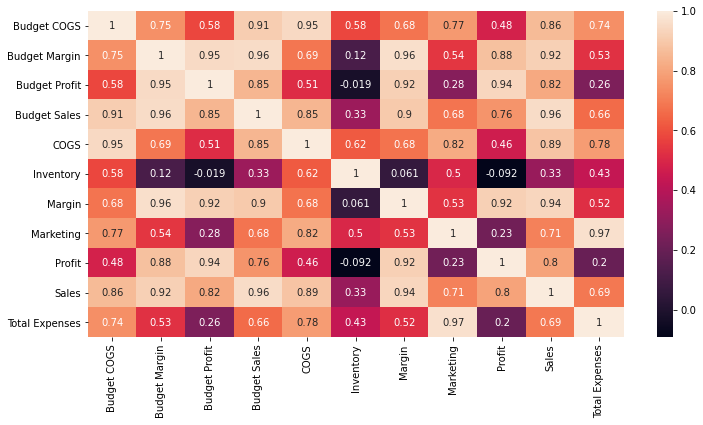

In [601]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.show()

### 15 Depict Budget Sales vs Sales on a Joint Plot

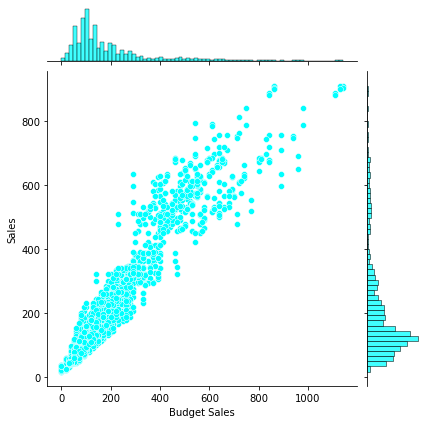

In [609]:
#plt.figure(figsize=(10,5))
sns.jointplot(x='Budget Sales', y='Sales',data=df, color='cyan')
plt.show()

### 16 Depict Total Expenses on Joint plot where Sales>300 or Profit>300 where joint plot type is scatter

In [614]:
df1=df[(df['Sales']>300) | (df['Profit']>300)]
df1.shape

(674, 18)

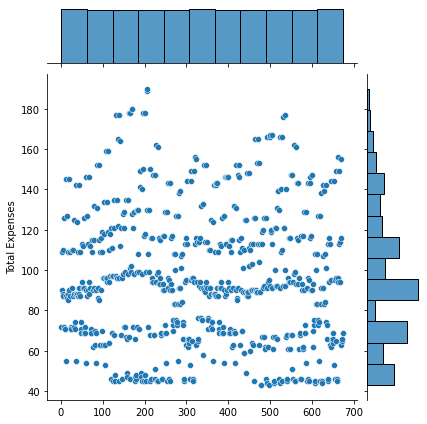

In [625]:
sns.jointplot(x=np.arange(1,675), y= 'Total Expenses',data=df1, kind='scatter')
plt.show()

### 17 Depict Budget COGS ON Joint plot where Market is Eastern and Type is Regular where joint plot type is hex

In [627]:
df1=df[(df['Market']=='East') & (df['Type']=='Regular')]
df1.shape

(600, 18)

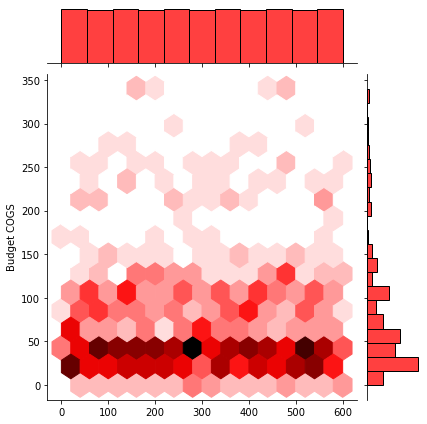

In [631]:
sns.jointplot(x=np.arange(0,600), y='Budget COGS', data=df1, kind='hex' ,color='red', palette='bright')
plt.show()

### 18 Depict Marketing on Joint plot where Market is not Central and Sales is over 500 where joint plot kind is kde

In [637]:
df1=df[(df['Market']!='Central') & (df['Sales']>500)]
df1.shape

(225, 18)

In [639]:
df1.head(3)

,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
90,East,Major Market,Colombian,Beans,Coffee,New York,Regular,260,380,260,640,271,2101,407,94,262,678,145
135,West,Major Market,Decaf Espresso,Beans,Espresso,California,Decaf,220,300,200,520,234,1310,312,77,203,546,109
143,West,Major Market,Colombian,Beans,Coffee,California,Regular,340,500,370,840,271,2101,407,94,262,678,145


In [1]:
sns.jointplot(x=np.arange(0,225), y='Marketing',data=df1, kind='kde', color='cyan')
plt.show()

NameError: name 'sns' is not defined